In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotly.offline import iplot
import seaborn as sns

from collections import Counter


# 1. Data Overview

In [2]:
# load data
df = pd.read_csv('data/usa_01.csv')
df

,YEAR,SEX,AGE,RACE,RACED,CITIZEN,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,OCC,UHRSWORK,INCWAGE
0,2009,1,51,1,100,0,0,0,0,0,0,0,0
1,2009,2,64,1,100,0,0,0,0,0,5310,40,27100
2,2009,1,68,1,100,0,0,0,0,0,6200,40,22100
3,2009,2,61,2,200,0,0,0,0,0,4020,32,6000
4,2009,1,38,2,200,0,0,0,0,0,5350,40,14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31290938,2018,2,9,1,100,0,3,33,0,0,0,0,999999
31290939,2018,2,7,1,100,0,3,31,0,0,0,0,999999
31290940,2018,2,49,1,100,0,0,0,0,0,3603,40,18500
31290941,2018,2,19,1,100,0,0,0,0,0,4255,40,11500


In [3]:
df = df.drop(columns=['RACED', 'GRADEATTD', 'DEGFIELDD', 'GRADEATT'])
df

,YEAR,SEX,AGE,RACE,CITIZEN,DEGFIELD,OCC,UHRSWORK,INCWAGE
0,2009,1,51,1,0,0,0,0,0
1,2009,2,64,1,0,0,5310,40,27100
2,2009,1,68,1,0,0,6200,40,22100
3,2009,2,61,2,0,0,4020,32,6000
4,2009,1,38,2,0,0,5350,40,14000
...,...,...,...,...,...,...,...,...,...
31290938,2018,2,9,1,0,0,0,0,999999
31290939,2018,2,7,1,0,0,0,0,999999
31290940,2018,2,49,1,0,0,3603,40,18500
31290941,2018,2,19,1,0,0,4255,40,11500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31290943 entries, 0 to 31290942
Data columns (total 9 columns):
 #   Column    Dtype
---  ------    -----
 0   YEAR      int64
 1   SEX       int64
 2   AGE       int64
 3   RACE      int64
 4   CITIZEN   int64
 5   DEGFIELD  int64
 6   OCC       int64
 7   UHRSWORK  int64
 8   INCWAGE   int64
dtypes: int64(9)
memory usage: 2.1 GB


In [5]:
df.isnull().sum(axis = 0)

YEAR        0
SEX         0
AGE         0
RACE        0
CITIZEN     0
DEGFIELD    0
OCC         0
UHRSWORK    0
INCWAGE     0
dtype: int64

## Data  Copy

In [6]:
import copy
df_origin = copy.deepcopy(df)

In [7]:
import copy
df = copy.deepcopy(df_origin)

# 2. Data Preprocessing

## 2.1 Decipher Preparation

### 2.1.1 Major-DEGFIELD

In [8]:
df_major = pd.read_csv('src/major.csv')
df_major.head()

,Percent,N,Value,Label,STEM
0,77.8,"24,349,205",0,NaN,0
1,0.3,"84,110",11,Agriculture,0
2,0.1,"45,157",13,Environment and Natural Resources,0
3,0.2,"48,911",14,Architecture,1
4,0.1,"22,055",15,"Area, Ethnic, and Civilization Studies",0


In [9]:
stem_values = list(Counter(df_major[df_major['STEM']==1]['Value']).keys())
stem_values

[14, 20, 21, 24, 25, 29, 34, 35, 36, 37, 50, 51, 55, 57, 59, 61]

### 2.1.2 Occupation-OCC

## 2.2 Code Interpretation

In [10]:
# sex
df['SEX'] = df['SEX'].apply(lambda x: 'Male' if str(x) == '1' else 'Femal')

,YEAR,SEX,AGE,RACE,CITIZEN,DEGFIELD,OCC,UHRSWORK,INCWAGE
0,2009,Male,51,1,NaN,NaN,NaN,NaN,NaN
1,2009,Femal,64,1,NaN,NaN,Non-STEM,=40,27100.0
2,2009,Male,68,1,NaN,NaN,Non-STEM,=40,22100.0
3,2009,Femal,61,2,NaN,NaN,Non-STEM,<40,6000.0
4,2009,Male,38,2,NaN,NaN,Non-STEM,=40,14000.0
...,...,...,...,...,...,...,...,...,...
31290938,2018,Femal,9,1,NaN,NaN,NaN,NaN,999999.0
31290939,2018,Femal,7,1,NaN,NaN,NaN,NaN,999999.0
31290940,2018,Femal,49,1,NaN,NaN,Non-STEM,=40,18500.0
31290941,2018,Femal,19,1,NaN,NaN,Non-STEM,=40,11500.0


In [ ]:
# CITIZEN
df['CITIZEN'] = df['CITIZEN'].apply(lambda x: np.nan if x == 0 else x)

In [ ]:
# major
df['DEGFIELD'] = df['DEGFIELD'].apply(lambda x: np.nan if int(x) == 0 else 'STEM' if x in stem_values else 'Non-STEM')

In [ ]:
# occupation
df['OCC'] = df['OCC'].apply(lambda x: np.nan if x == 0 else 'STEM' if x in range(1000, 2000) else 'Non-STEM')

In [ ]:
# usual work hours per week
df['UHRSWORK'] = df['UHRSWORK'].apply(lambda x: np.nan if int(x) == 0 else '<40' if int(x) < 40 else '=40' if int(x) == 40 else '>40')

In [ ]:
# income of wage and salary
df['INCWAGE'] = df['INCWAGE'].apply(lambda x: np.nan if x == 0 else x)

In [ ]:
df

## 2.? Drop nan values

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782048 entries, 75 to 31290900
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   YEAR      782048 non-null  int64  
 1   SEX       782048 non-null  object 
 2   AGE       782048 non-null  int64  
 3   RACE      782048 non-null  int64  
 4   CITIZEN   782048 non-null  float64
 5   DEGFIELD  782048 non-null  object 
 6   OCC       782048 non-null  object 
 7   UHRSWORK  782048 non-null  object 
 8   INCWAGE   782048 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 59.7+ MB


# 3. Data Visualization

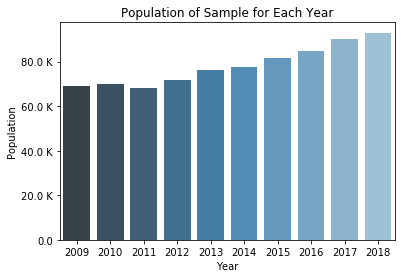

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', data=df, palette="Blues_d")
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel("Year")
ax.axes.set_title("Population of Sample for Each Year")
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

### Sex VS Year

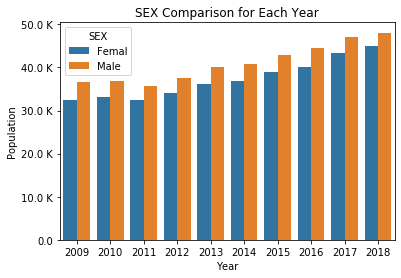

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', hue='SEX', data=df)
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel('Year')
ax.axes.set_title('SEX Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

### Major VS SEX 

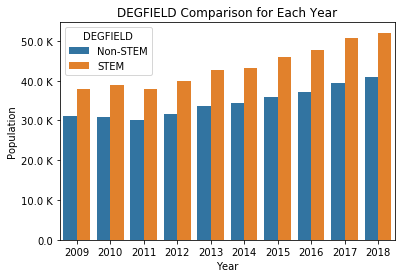

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', hue='DEGFIELD', data=df)
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel('Year')
ax.axes.set_title('DEGFIELD Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

In [15]:
occupations = dict(Counter(df['OCC']))
occupations_years = dict()
for o in occupations.keys():
    years = dict(zip(Counter(df['YEAR']).keys(), [0]*len(Counter(df['YEAR']).keys())))
    years_new = dict(Counter(df[df['OCC']==o]['YEAR']))
    for y in years:
        years[y] += years_new[y]
    occupations_years[o] = years
occupations_years
    

{'Non-STEM': {2009: 55523,
  2010: 56766,
  2011: 55514,
  2012: 58252,
  2013: 61595,
  2014: 62787,
  2015: 65885,
  2016: 67908,
  2017: 72412,
  2018: 74787},
 'STEM': {2009: 13493,
  2010: 13201,
  2011: 12413,
  2012: 13382,
  2013: 14672,
  2014: 14813,
  2015: 15884,
  2016: 16788,
  2017: 17798,
  2018: 18175}}

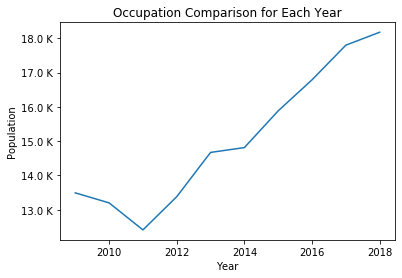

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.lineplot(x=list(occupations_years['STEM'].keys()), y=list(occupations_years['STEM'].values()))
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel('Year')
ax.axes.set_title('Occupation Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

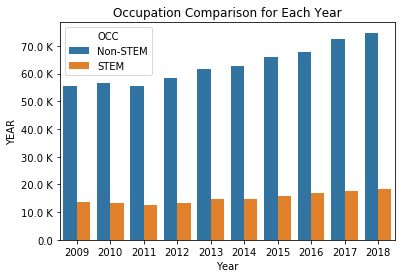

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', hue='OCC', data=df)
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('YEAR')
ax.set_xlabel('Year')
ax.axes.set_title('Occupation Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()